### Import and manipulating data




In [129]:
import sklearn.datasets as skdat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import
%matplotlib inline


#importing datasets
greenhouse= pd.read_excel('greenhouse.xlsx')
cereal = pd.read_excel('cereal.xlsx')
fertilizer = pd.read_excel('fertilizer.xlsx')


def manipulate(x):
    """ Manipulating the dataset by removing unnecessary columns for plotting and inspection purposes"""
    
    x = x.transpose() 
    x = x.rename(columns=x.iloc[0]) 
    x = x.rename(columns={"Country Name":"Year"}) 
    x = x.dropna(axis=1,how='all') 
    x = x.reset_index(drop = True)
    x = x.drop([0, 1, 2, 3])
    x=x.set_index("Year")
    x=x.transpose()
    x=x.fillna(0)
    return x

def norm(array):
    """ Returns array normalised to [0,1] (taken from practical 10) """

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array - min_val) / (max_val - min_val)
    
    return scaled

def norm_df(df):
    
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine.(taken from practical 10)
    
    """
    
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

#apply the function defined from above

greenhouse=manipulate(greenhouse)
fertilizer=manipulate(fertilizer)
cereal=manipulate(cereal)

#normalize dataset

greenhouse=norm_df(greenhouse)
fertilizer=norm_df(fertilizer)
cereal=norm_df(cereal)

#### Extract the years that i want from each 3 of the datasets

In [124]:
#greenhouse.iloc[:, 20] #year

g70=greenhouse.iloc[:, 10] #1970
g00=greenhouse.iloc[:,40]#2000
f70=fertilizer.iloc[:, 10]
f00=fertilizer.iloc[:,40]
c70=cereal.iloc[:, 10]
c00=cereal.iloc[:,40]


#####  plot different attributes to check for expected clusters for year 2000


Text(0, 0.5, 'fertilizer')

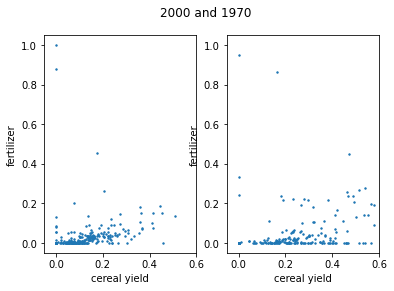

In [125]:
    
plt.subplot(1,2,1)
plt.suptitle("2000 and 1970")
plt.scatter(c00,f00,s=2)
plt.xlim(right=0.6)     
plt.xlabel("cereal yield")
plt.ylabel("fertilizer")

plt.subplot(1,2,2)

plt.scatter(c70,f70,s=2)
plt.xlim(right=0.6)     
plt.xlabel("cereal yield")
plt.ylabel("fertilizer")




(-0.05, 0.4)

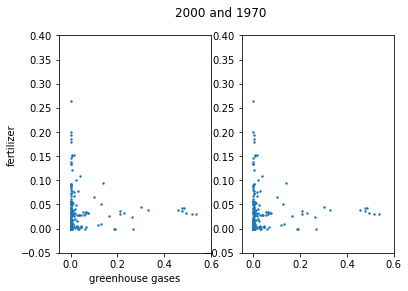

In [126]:
plt.subplot(1,2,1)

plt.suptitle("2000 and 1970")
plt.scatter(g00,f00,s=2)
plt.xlim(right=0.6)
plt.ylim(top=0.4)
plt.xlabel("greenhouse gases")
plt.ylabel("fertilizer")


plt.subplot(1,2,2)

plt.scatter(g00,f00,s=2)
plt.xlim(right=0.6)
plt.ylim(top=0.4)


(-0.05, 0.6)

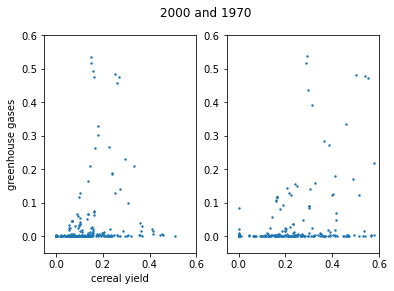

In [127]:
plt.subplot(1,2,1)
plt.suptitle("2000 and 1970")
plt.scatter(c00,g00,s=2)
plt.xlim(right=0.6)
plt.ylim(top=0.6)
plt.xlabel("cereal yield")
plt.ylabel("greenhouse gases")

plt.subplot(1,2,2)
plt.scatter(c70,g70,s=2)
plt.xlim(right=0.6)
plt.ylim(top=0.6)



#### picking  greenhouse  v cereal yield for clustering using various methods


C:\Users\keith\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'cereal yield')

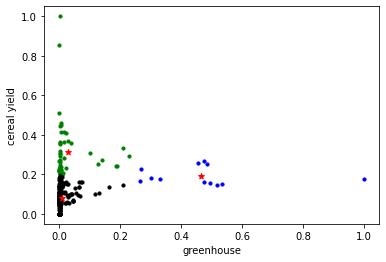

In [190]:
#kmeans method for year 2000

fvc=pd.concat([g00,c00],axis=1)  
fvcg=fvc.iloc[:,0] #greenhouse
fvcc=fvc.iloc[:,1] #cereal


kmeans = cluster.KMeans(n_clusters=3)

predict=kmeans.fit_predict(fvc)

fvc['cluster']=predict

fvc1=fvc[fvc.cluster==0]
fvc2=fvc[fvc.cluster==1]
fvc3=fvc[fvc.cluster==2]

plt.scatter(fvc1.iloc[:,0],fvc1.iloc[:,1],color='green',s=10)
plt.scatter(fvc2.iloc[:,0],fvc2.iloc[:,1],color='blue',s=10)
plt.scatter(fvc3.iloc[:,0],fvc3.iloc[:,1],color='black',s=10)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='*')

plt.xlabel("greenhouse")
plt.ylabel("cereal yield")

C:\Users\keith\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'cereal yield')

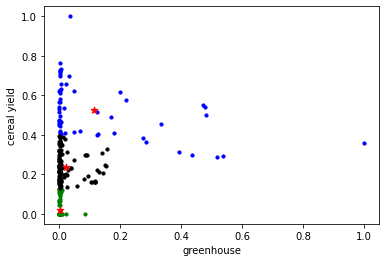

In [196]:
# same as above but for 1970 instead

fvc=pd.concat([g70,c70],axis=1)
fvcg=fvc.iloc[:,0] #greenhouse
fvcc=fvc.iloc[:,1] #cereal


kmeans = cluster.KMeans(n_clusters=3)

predict=kmeans.fit_predict(fvc)

fvc['cluster']=predict

fvc4=fvc[fvc.cluster==0]
fvc5=fvc[fvc.cluster==1]
fvc6=fvc[fvc.cluster==2]

plt.scatter(fvc4.iloc[:,0],fvc4.iloc[:,1],color='green',s=10)
plt.scatter(fvc5.iloc[:,0],fvc5.iloc[:,1],color='blue',s=10)
plt.scatter(fvc6.iloc[:,0],fvc6.iloc[:,1],color='black',s=10)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='*',s=50)

plt.xlabel("greenhouse")
plt.ylabel("cereal yield")

#### Agglomerative clustering method


In [ ]:
ac = cluster.AgglomerativeClustering(n_clusters=3)

wi
